In [8]:
import torch

# Charger l'architecture du modèle
from torchvision.models.segmentation import fcn_resnet50

# Charger le modèle sauvegardé
model_path = "UNet_4levels_30epochs.pth"
# trained_model = fcn_resnet50(num_classes=1)  # Adapter selon l'architecture utilisée

trained_model = fcn_resnet50(num_classes=1)  # Adapter les paramètres ici
trained_model.load_state_dict(torch.load(model_path), strict=False)

model_state = torch.load(model_path)
current_state = trained_model.state_dict()

# print("Missing keys:", [key for key in current_state.keys() if key not in model_state])
# print("Unexpected keys:", [key for key in model_state.keys() if key not in current_state])

# trained_model.load_state_dict(torch.load(model_path))
# trained_model.eval()  # Mode évaluation (désactive dropout, batchnorm, etc.)

C:\Users\Gauthier\AppData\Local\Temp\ipykernel_14720\3591546450.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  trained_model.load_state_dict(torch.load(model_path), st

In [12]:
from torchvision import transforms
from PIL import Image

# Charger l'image satellite
# image_path = "C:\\Users\\Gauthier\\Desktop\\EPFL\\Master\\Machine Learning\\projet\project_2\\test\\training\\images\\satImage_017.png"
image_path = "C:\\Users\\Gauthier\\Desktop\\EPFL\\Master\\Machine Learning\\projet\\project_2\\test\\test_set_images\\test_6\\test_6.png"
image = Image.open(image_path).convert("RGB")  # Assure-toi que c'est en RGB

# Appliquer les transformations (adapter selon l'entraînement)
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Redimensionner
    transforms.ToTensor(),          # Convertir en tenseur
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normaliser
])

input_image = transform(image).unsqueeze(0)  # Ajouter une dimension batch [1, C, H, W]

In [13]:
# Déplacer l'image et le modèle sur le bon dispositif (CPU ou GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
trained_model = trained_model.to(device)
input_image = input_image.to(device)

# Générer la prédiction
with torch.no_grad():
    output = trained_model(input_image)["out"]  # "out" est spécifique aux modèles de segmentation
    prediction = torch.sigmoid(output).squeeze(0)  # Appliquer Sigmoid pour une probabilité
    binary_mask = prediction > 0.5  # Convertir en masque binaire

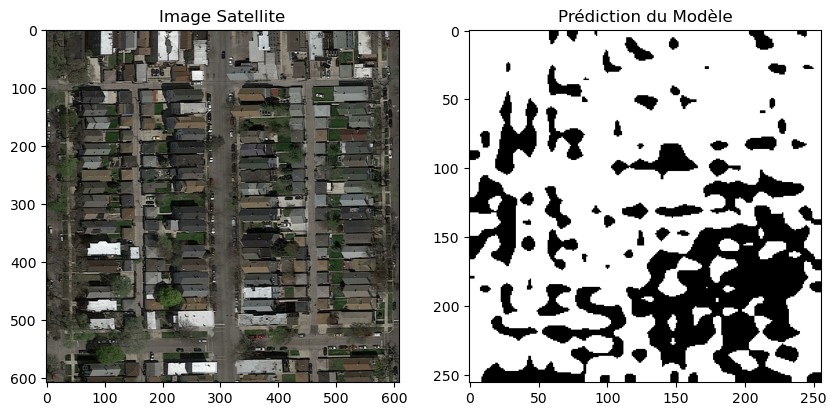

In [14]:
import matplotlib.pyplot as plt

# Convertir le masque en numpy pour l'afficher
binary_mask_np = binary_mask.cpu().numpy()
binary_mask_np = binary_mask_np.squeeze(0)

# Afficher l'image originale et la prédiction
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Image Satellite")
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.title("Prédiction du Modèle")
plt.imshow(binary_mask_np, cmap="gray")
plt.show()